In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Sample data

#### reading the file

In [2]:
sales_file= pd.read_csv('Sales_April_2019.csv/Sales_April_2019.csv')
sales_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [3]:
sales_file.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


#### Duplicate find out

In [4]:
sales_file.dropna(how='any',inplace=True)

In [5]:
countnull = sales_file.isnull().sum()
print(countnull)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [6]:
#counting duplicates
for col in sales_file:
    duplicate_count = sales_file[col].duplicated().sum()
    print(f"Column {col} - {duplicate_count} duplicate values.")

Column Order ID - 786 duplicate values.
Column Product - 18304 duplicate values.
Column Quantity Ordered - 18316 duplicate values.
Column Price Each - 18305 duplicate values.
Column Order Date - 4740 duplicate values.
Column Purchase Address - 1204 duplicate values.


In [7]:
# sales_file.drop_duplicates(subset='Order ID', inplace = True)
for col in sales_file:
    duplicatecount = sales_file[col].duplicated().sum()
    print(f"Column {col} - {duplicatecount} duplicate values.")

Column Order ID - 786 duplicate values.
Column Product - 18304 duplicate values.
Column Quantity Ordered - 18316 duplicate values.
Column Price Each - 18305 duplicate values.
Column Order Date - 4740 duplicate values.
Column Purchase Address - 1204 duplicate values.


In [8]:
sales_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18324 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 1002.1+ KB


In [9]:
# Step 1: Read and clean

sales_file.columns = sales_file.columns.str.strip()

In [10]:
sales_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
# Step 2: Convert Quantity Ordered to numeric
sales_file['Quantity Ordered'] = pd.to_numeric(sales_file['Quantity Ordered'], errors='coerce')
sales_file['Price Each']=pd.to_numeric(sales_file['Price Each'], errors='coerce')

In [12]:
# Step 3: Drop NaNs
sales_file.dropna(subset=['Product', 'Quantity Ordered'], inplace=True)

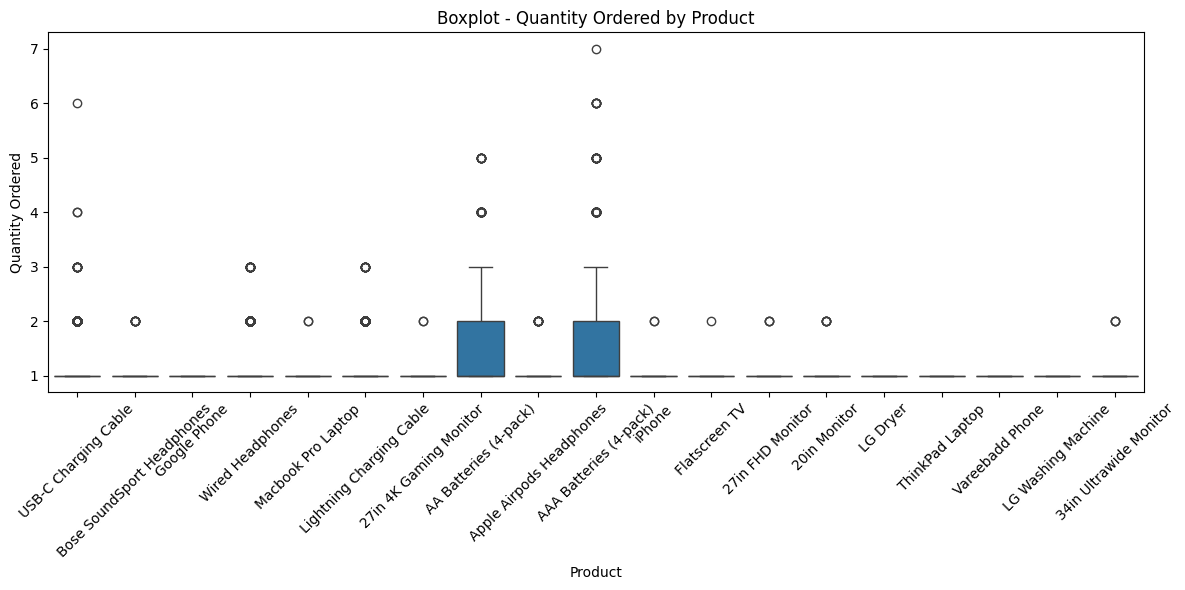

In [13]:
# Step 4: Plot (group by Product instead of Order ID)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Quantity Ordered', data=sales_file)
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Boxplot - Quantity Ordered by Product')
plt.tight_layout()
plt.show()

In [14]:
sales_file['Total Price']=sales_file['Quantity Ordered'] * sales_file['Price Each']
sales_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18289 entries, 0 to 18382
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18289 non-null  object 
 1   Product           18289 non-null  object 
 2   Quantity Ordered  18289 non-null  float64
 3   Price Each        18289 non-null  float64
 4   Order Date        18289 non-null  object 
 5   Purchase Address  18289 non-null  object 
 6   Total Price       18289 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


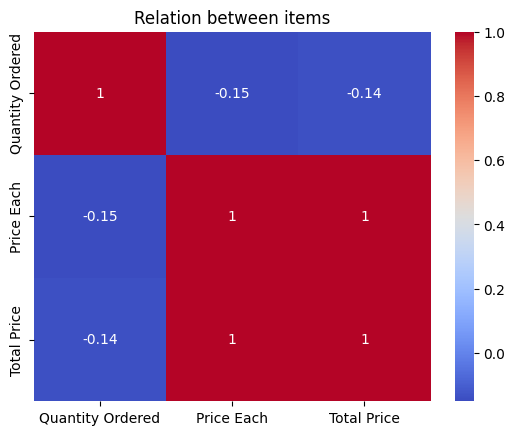

In [15]:
plt.Figure(figsize=(20,40))
corr_Matrix = sales_file[['Quantity Ordered', 'Price Each' , 'Total Price']].corr()
sns.heatmap(corr_Matrix , annot=True , cmap = 'coolwarm' )
plt.title('Relation between items')
plt.show()

In [16]:
sales_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [17]:
# when price increases sales decreases by 15 % and vice versa 
# 27in 4k gaming Monitor and Apple airpodes headphones are mostly saled in 1-2 quanties.


In [18]:
# Feature Extraction
# Feature- input column
#EDA - dataset ke description nikalna


In [ ]:
for col in sales_file:
    if col == 'Product':
        

In [19]:
unique_products_list = sales_file['Product'].dropna().unique().tolist()
print(unique_products_list)

['USB-C Charging Cable', 'Bose SoundSport Headphones', 'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop', 'Lightning Charging Cable', '27in 4K Gaming Monitor', 'AA Batteries (4-pack)', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV', '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop', 'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor']


In [20]:
product_sales = sales_file.groupby('Product')['Total Price'].sum().sort_values(ascending=False)
print(product_sales)


Product
Macbook Pro Laptop            773500.00
iPhone                        486500.00
ThinkPad Laptop               391996.08
Google Phone                  348600.00
34in Ultrawide Monitor        248133.47
Apple Airpods Headphones      228750.00
27in 4K Gaming Monitor        220344.35
Flatscreen TV                 137700.00
Bose SoundSport Headphones    128787.12
27in FHD Monitor              110542.63
Vareebadd Phone                88000.00
LG Dryer                       46200.00
20in Monitor                   43446.05
LG Washing Machine             36600.00
Lightning Charging Cable       35446.45
USB-C Charging Cable           27126.50
Wired Headphones               24771.34
AA Batteries (4-pack)          10836.48
AAA Batteries (4-pack)          8778.64
Name: Total Price, dtype: float64


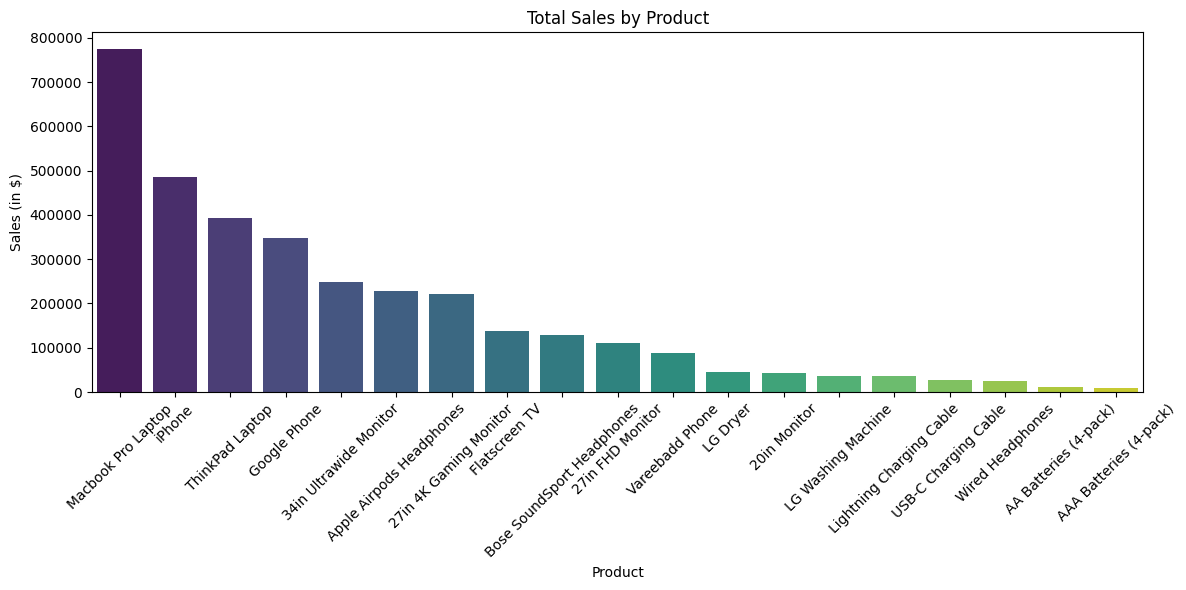

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, hue=product_sales.index, palette='viridis', legend=False)


plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales (in $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()